# How to do a perfect Twitter sentiment analysis using Twitter API

Inspiration: https://medium.com/@dprakash05/twitter-sentiment-analysis-f81f3d24c795

The aim is to analyse and to preprocess the tweets using Twitter API.

The first goal is to analyse individual tweets as positive, negative and neutral.

In this notebook the difference between polarity and subjective is that polarity is a float in the range of -1 to 1. Number 1 means a positive statement and -1 means a negative statement. 

The polarity indicates sentiment with a value from -1 (negative) to 1 (positive). And 0 is neutral. 

It is important to note that subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 

Subjectivity is also a float in the range from 0 to 1. The subjectivity is a value from 0 (objective) to 1 (subjective).

## Importing libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re                         
plt.style.use('fivethirtyeight')

## Creating Twitter API

In [2]:
# Creating Twitter API: consumerkey, consumersecret, accesstoken, accesstokensecret

consumerkey='secret'
consumersecret='secret'
accesstoken='secret'
accesstokensecret='secret'

## Authenticate Twitter API

In [3]:
import tweepy
authenticate=tweepy.OAuthHandler(consumerkey,consumersecret)
#set access token and access token secret
authenticate.set_access_token(accesstoken, accesstokensecret)
#create API object while passing in authentication information
api=tweepy.API(authenticate, wait_on_rate_limit=True)

## Accessing tweets
### We are extracting recent 200 tweets of Alex Stubb for analysis.

In [4]:
# The most recent 200 tweets

post=api.user_timeline(screen_name='alexstubb',count=500, tweet_mode='extended')

## Printing 5 recent tweets

In [5]:
# printing 15 recent tweets

print('showing 5 recent tweets: \n')
i=1
for tweet in post[:5]:    
    
        print(str(i)+')'+tweet.full_text + '\n' )
        i+=1

showing 5 recent tweets: 

1)RT @STGEUI: 💻📲 Looking forward to the #FightingMisinformationOnline summit!
🔎 Check out the programme featuring our @alexstubb 
 📍in Brusse…

2)Never lets you down. @FukuyamaFrancis https://t.co/ndu29oWl7r

3)RT @STGEUI: Have you already registered for the 2022 @JCMS_EU Annual Review Lecture?

Don't miss the opportunity to hear @ProfCRadaelli's t…

4)The pendulum keeps on swinging between market and state. 

Subsidies and protectionism are always a sub-optimal solution. 

Free trade and competition is what creates growth and the basis for welfare.

 https://t.co/GDV8C0npNz

5)Funny how habits change. Been getting my news online for a long time. Find it difficult to read an old school newspaper.

Opposite with books. There I am more traditional.

Audio versions work on both books and news. https://t.co/4VsaTKe8zR



## Extracting english tweets only

In [6]:
# extracting english tweets only

print('showing recent english tweets: \n')
i=1
for tweet in post:
    if i<=5:    
        if tweet.lang=='en':
            print(str(i),')',tweet.full_text + '\n' )
            i+=1

showing recent english tweets: 

1 ) RT @STGEUI: 💻📲 Looking forward to the #FightingMisinformationOnline summit!
🔎 Check out the programme featuring our @alexstubb 
 📍in Brusse…

2 ) Never lets you down. @FukuyamaFrancis https://t.co/ndu29oWl7r

3 ) RT @STGEUI: Have you already registered for the 2022 @JCMS_EU Annual Review Lecture?

Don't miss the opportunity to hear @ProfCRadaelli's t…

4 ) The pendulum keeps on swinging between market and state. 

Subsidies and protectionism are always a sub-optimal solution. 

Free trade and competition is what creates growth and the basis for welfare.

 https://t.co/GDV8C0npNz

5 ) Funny how habits change. Been getting my news online for a long time. Find it difficult to read an old school newspaper.

Opposite with books. There I am more traditional.

Audio versions work on both books and news. https://t.co/4VsaTKe8zR



## Extracting finnish tweets only

In [7]:
# extracting finnish tweets only

print('showing recent finnish tweets: \n')
i=1
for tweet in post:
    if i<=5:    
        if tweet.lang=='fi':
            print(str(i),')',tweet.full_text + '\n' )
            i+=1

showing recent finnish tweets: 

1 ) RT @kaustoFI: Hyvä tavaton.😵 #nbafi https://t.co/zGiereXBkU

2 ) RT @SYL_FIN: Liittokokouspuheen tulee pitämään Suomen entinen pääministeri Alexander Stubb @alexstubb.

Finlands f.d. statsminister Alexand…

3 ) RT @SYL_FIN: Liittokokouspuheessaan @alexstubb painotti yhteistyön merkitystä globaalien haasteiden ratkaisemisessa.

”Globaalia yhteistyöt…

4 ) RT @SYL_FIN: "Kaikki lähtee koulutuksesta: siitä että on avoin mieli ja tahto ymmärtää" - @alexstubb 

Juuri näin 👏 Suuri kiitos, kun pääsi…

5 ) RT @treytampere: Lopuksi @alexstubb antaa vinkkejä opintojen ja vapaa-ajan tasapainottamiselle:
💛 Ole armollinen itsellesi.
💛 Huolehdi keho…



## Getting tweets with keyword, hashtags or trending items also insted of some user name 
### Now searching top trending tweets for “Suomi”.

In [8]:
# searching top trending tweets for suomi

cursor=tweepy.Cursor(api.search_tweets,
       q='Suomi',tweet_mode='extended').items(25)
for i in cursor:   
    print(i.full_text)

これはタリンの激おしゃレストラン。店員さんが美男美女。

#tallinn #Estonia #タリン #エストニア #illustration https://t.co/VxWM6Q6Cgb
RT @FingoFi: Vaikka #kehitysyhteistyö'n avulla Suomi voi hankkia ystäviä ja vaikutusvaltaa, emme saa unohtaa sen ensisijaisia tehtäviä: köy…
RT @EAhtola: Suomi on tarponut 15 vuotta ilman talouskasvua.

Silti kukaan ei halua minkään muuttuvan. 

Vahvasti keskusvetoisella mallilla…
Herää Suomi
Tapahtuman neljäs ja viimeinen puhuja on Tuukka Kuru!

Tuukka Kuru on 32-vuotias Rovaniemellä syntynyt koneinsinööri, joka toimii tällä hetkellä Sinimusta Liike-nimisen radikaalikansallismielisen puolueen puheenjohtajana. https://t.co/JV8ezW2jy0
https://t.co/ckFeNitxyM

#Skotlanti #Itsenäisyys #suomi #suhteet #Puolueet #Populismi
Pietinen, n. 1936: sisustusliike Pirtti Oy:n myymäläsali (Suomi, Helsinki, Suomi, Helsinki; Helsinki, Museovirasto) https://t.co/c3VMgPjQ5r
@Vital_Idol @Jyk1231 @MikkoVuorenpaa Suomi on edelleen maailman turvallisimpia paikkoja. Muuten tiede tai historia ei tue johtopäätöstäsi

## Creating dataframe
### Converting all 200 tweets into dataframe, so that we can clean and analyse given tweets

In [9]:
# converting tweets into dataframe

df=pd.DataFrame([tweet.full_text for tweet in post if tweet.lang=='en'], columns=['Tweets'])
df.tail(10)

,Tweets
152,Wanna survive #November in Scandinavia? Go out...
153,RT @easy_jonathan: @alexstubb @FT That’s just ...
154,RT @laurnorman: @alexstubb @FT No violence. Wh...
155,RT @alexstubb: Recommended reading by the ever...
156,RT @emanuelemarcon: @alexstubb @FT The title i...
157,Recommended reading by the ever so level-heade...
158,If you want peace:\n\n1. March in Moscow.\n\n2...
159,RT @alexstubb: International negotiations requ...
160,Yup. We do cool stuff!!! https://t.co/azBFxyRcwb
161,RT @STGEUI: 🏆 … and the winner is..\n\n🎉 “Afri...


In [10]:
df.to_csv('stubb200tweets07122021.csv')

## Creating function to clean and remove unwanted text or symbols

In [11]:
# creating function go clean tweets

def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) ## removing @ mention
    text=re.sub(r'#','',text)             ## removing # symbol
    text=re.sub(r'RT[\s]+','',text)  ## removing RT followed byspace
    text=re.sub(r'🦠+','',text)  ## removing sign
    text=re.sub(r':+','',text)  ## removing sign
    text=re.sub(r'"+','',text)  ## removing sign
    text=re.sub(r',+','',text)  ## removing sign
    
  #df=df[~df.Tweets.str.contains('RT')] --> another way to remove RT
    text=re.sub(r'https?:\/\/\S+','',text) ## removing https
    return text
df['Tweets']=df['Tweets'].apply(cleanTxt)   ## applying function
## clean Text
df.tail(10)

,Tweets
152,Wanna survive November in Scandinavia? Go out ...
153,_jonathan That’s just in Rome. Meanwhile in ...
154,No violence. What a slogan. Let’s be honest...
155,Recommended reading by the ever so level-head...
156,The title is misleading. There is here in I...
157,Recommended reading by the ever so level-heade...
158,If you want peace\n\n1. March in Moscow.\n\n2....
159,International negotiations require patience.\...
160,Yup. We do cool stuff!!! https//t.co/azBFxyRcwb
161,🏆 … and the winner is..\n\n🎉 “African Renaiss...


## Getting subjectivity and polarity

Using cleaned tweets

In [12]:
# Getting subjectivity and polarity using cleaned tweets

from textblob import TextBlob

## create function to subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
## create two new column
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
## show new Dataframe
df.head(15)

,Tweets,Subjectivity,Polarity
0,💻📲 Looking forward to the FightingMisinformat...,0.000000,0.000000
1,Never lets you down. https//t.co/ndu29oWl7r,0.288889,-0.155556
2,Have you already registered for the 2022 _EU ...,0.000000,0.000000
3,The pendulum keeps on swinging between market ...,0.800000,0.400000
4,Funny how habits change. Been getting my news ...,0.550000,0.042857
5,Brexit is a big part of this story. Naturally ...,0.537500,0.031250
6,🇳🇴🇫🇮🇸🇪Defence Ministers took further steps to...,0.500000,0.000000
7,Good evening London. Father-daughter night out...,0.600000,0.700000
8,Had a good phone call with Secretary General...,0.408333,0.208333
9,The _Commission is disbursing a further €2.5 ...,0.500000,0.000000


In [13]:
## Creating function to compute positive, negative and neutral analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head(15)

,Tweets,Subjectivity,Polarity,Analysis
0,💻📲 Looking forward to the FightingMisinformat...,0.000000,0.000000,Neutral
1,Never lets you down. https//t.co/ndu29oWl7r,0.288889,-0.155556,Negative
2,Have you already registered for the 2022 _EU ...,0.000000,0.000000,Neutral
3,The pendulum keeps on swinging between market ...,0.800000,0.400000,Positive
4,Funny how habits change. Been getting my news ...,0.550000,0.042857,Positive
5,Brexit is a big part of this story. Naturally ...,0.537500,0.031250,Positive
6,🇳🇴🇫🇮🇸🇪Defence Ministers took further steps to...,0.500000,0.000000,Neutral
7,Good evening London. Father-daughter night out...,0.600000,0.700000,Positive
8,Had a good phone call with Secretary General...,0.408333,0.208333,Positive
9,The _Commission is disbursing a further €2.5 ...,0.500000,0.000000,Neutral


### Getting negative tweets from dataframe

In [14]:
## negative Tweets in dataframe

df2 = df.groupby('Analysis')
df2.get_group('Negative')

,Tweets,Subjectivity,Polarity,Analysis
1,Never lets you down. https//t.co/ndu29oWl7r,0.288889,-0.155556,Negative
10,Zero Covid is a policy doomed to fail. \n\nChi...,0.300000,-0.500000,Negative
18,Russian officials are not invited to MSC2023....,0.050000,-0.050000,Negative
33,Lauri Markkanen dropped 38 PTS (20 PTS in 2nd...,0.188889,-0.188889,Negative
61,_EUI ⚠️ False news of the month \n\nIn October...,0.566667,-0.100000,Negative
63,Live on in a few minutes.,0.300000,-0.031818,Negative
65,Things just went from bad to worse for Russia...,0.633333,-0.550000,Negative
66,Things just went from bad to worse for Russia....,0.711111,-0.066667,Negative
67,My condolences to our Polish brothers in arms...,0.516667,-0.133333,Negative
86,A tough week for doomsday pessimists.\n\n1. D...,0.666667,-0.126263,Negative


### Getting positive  tweets from dataframe

In [15]:
## positive tweets in Dataframe

df[df.Analysis=='Positive']   ## Another way of indexing

,Tweets,Subjectivity,Polarity,Analysis
3,The pendulum keeps on swinging between market ...,0.800000,0.400000,Positive
4,Funny how habits change. Been getting my news ...,0.550000,0.042857,Positive
5,Brexit is a big part of this story. Naturally ...,0.537500,0.031250,Positive
7,Good evening London. Father-daughter night out...,0.600000,0.700000,Positive
8,Had a good phone call with Secretary General...,0.408333,0.208333,Positive
...,...,...,...,...
155,Recommended reading by the ever so level-head...,0.800000,0.400000,Positive
157,Recommended reading by the ever so level-heade...,0.544444,0.383333,Positive
158,If you want peace\n\n1. March in Moscow.\n\n2....,0.333333,0.333333,Positive
160,Yup. We do cool stuff!!! https//t.co/azBFxyRcwb,0.650000,0.683594,Positive


### Printing all positive tweets

In [16]:
## printing all positive tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)The pendulum keeps on swinging between market and state. 

Subsidies and protectionism are always a sub-optimal solution. 

Free trade and competition is what creates growth and the basis for welfare.

 https//t.co/GDV8C0npNz

2)Funny how habits change. Been getting my news online for a long time. Find it difficult to read an old school newspaper.

Opposite with books. There I am more traditional.

Audio versions work on both books and news. https//t.co/4VsaTKe8zR

3)Brexit is a big part of this story. Naturally not the only part but still one of the biggest own goals in modern history. Time to start building bridges back to Europe.

UK’s growth prospects worst among top economies warns OECD via 
 https//t.co/LlY7LSurOB

4)Good evening London. Father-daughter night out is about as good as it gets. https//t.co/njJIXZdum7

5) Had a good phone call with  Secretary General  today ahead of the NATO Foreign Ministers’ Meeting whe…

6) On Thursday Alessio Terzi will present his book Growth 

### Printing all negative tweets

In [17]:
## printing all negative tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1)Never lets you down.  https//t.co/ndu29oWl7r

2)Zero Covid is a policy doomed to fail. 

China lockdowns reach record level as coronavirus cases soar via 
 https//t.co/6dCx73IgxN

3) Russian officials are not invited to MSC2023. We will not give them a platform for their propaganda. We want to discuss Ru…

4) Lauri Markkanen dropped 38 PTS (20 PTS in 2nd half) in the  victory logging his 4th 30+ point game of the season. TakeN…

5)_EUI ⚠️ False news of the month 

In October the most circulated false news is about Erik Olsen leading the investigation on…

6)Live on   in a few minutes.

7) Things just went from bad to worse for Russia. 

Hitting a  country with two missiles stray or otherwise is never a g…

8)Things just went from bad to worse for Russia. 

Hitting a  country with two missiles stray or otherwise is never a good idea.

Important to stay cool calm and collected as always.

Support for Ukraine will increase. Russia's appeasers decrease.

9) My condolences to our Polish b

### Plotting word cloud

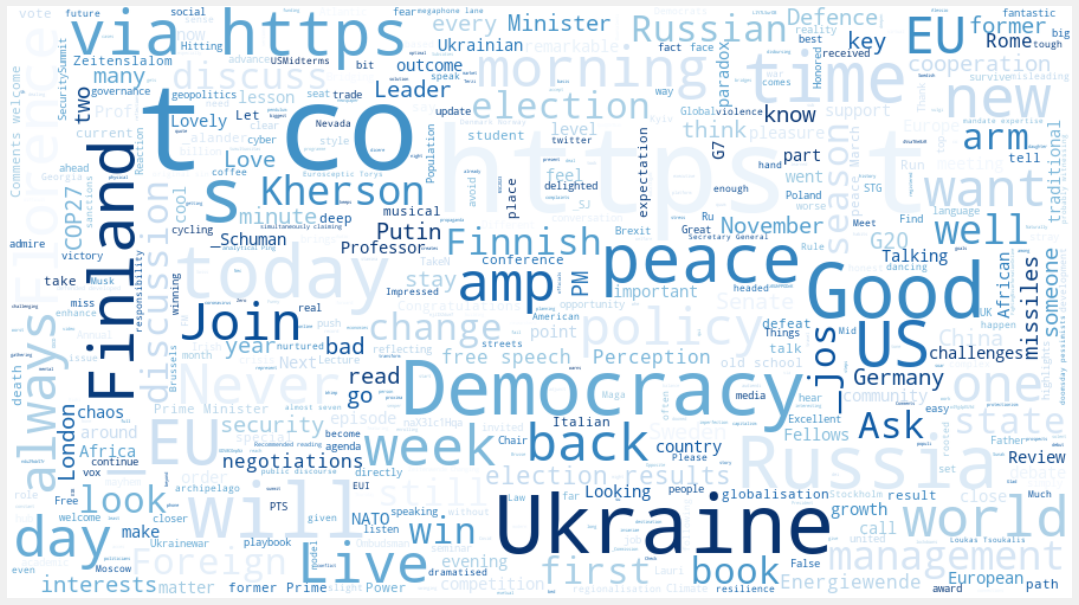

In [18]:
# plotting word cloud

from wordcloud import WordCloud

## plot word Cloud
allWords=' '.join([twts for twts in df['Tweets']])
#wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
#plt.imshow(wordCloud,interpolation='bilinear' )
#plt.axis('off')
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      background_color='white',
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(allWords)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Plotting scatter graph between polarity and subjectivity

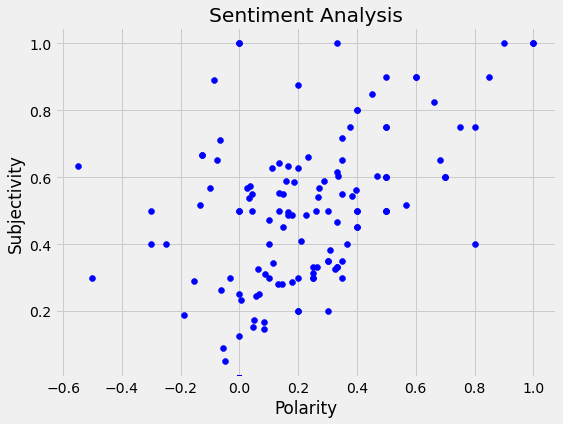

In [19]:
## plotting polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'] 
    [i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Red dots represent negative tweets, green dots represent positive tweets and remaining blue dots are neutral tweets.

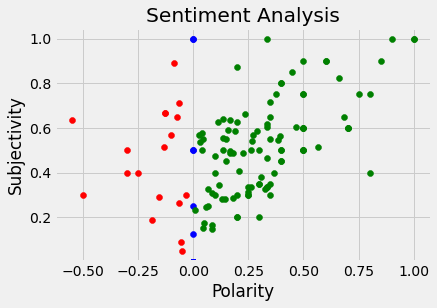

In [20]:
# visualising the sentiment analysis with dots

for index,row in df.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### Plotting positive and negative tweets using bar graph

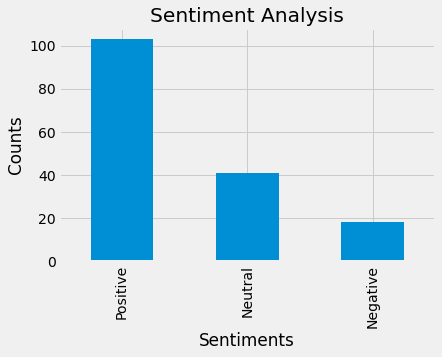

In [21]:
# Positive and negative tweets and plotting bar graph

ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
round((ntweets.shape[0]/df.shape[0])*100,1)
## show value counts
df['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

As you can see, from the above bar graph we can conclude that there are more positive tweets than negative tweets.